# SmartHealth - EDA and Modeling

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib
from sklearn.datasets import load_iris

In [2]:

# Load your dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded)))
df.head()


Saving disease_dataset.csv to disease_dataset.csv


,irregular_heartbeat,sore_throat,dark_urine,slow_healing_wounds,unexplained_weight_loss,muscle_cramps,fatigue,nausea,fever,chest_pain,...,loss_of_taste,abdominal_pain,trouble_sleeping,frequent_urination,headache,swelling_in_legs,increased_thirst,blurred_vision,dizziness,disease
0,No,Yes,No,No,No,No,No,No,Yes,No,...,Yes,No,No,No,No,No,No,No,No,COVID-19
1,No,No,No,No,No,Yes,Yes,Yes,No,No,...,No,No,No,No,No,No,No,No,No,Kidney Disease
2,No,No,No,No,No,No,Yes,No,No,No,...,No,No,No,Yes,No,No,No,No,No,Diabetes
3,No,No,No,No,No,No,No,No,No,No,...,No,No,Yes,No,No,No,No,No,No,Asthma
4,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,Asthma


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   irregular_heartbeat      1000 non-null   object
 1   sore_throat              1000 non-null   object
 2   dark_urine               1000 non-null   object
 3   slow_healing_wounds      1000 non-null   object
 4   unexplained_weight_loss  1000 non-null   object
 5   muscle_cramps            1000 non-null   object
 6   fatigue                  1000 non-null   object
 7   nausea                   1000 non-null   object
 8   fever                    1000 non-null   object
 9   chest_pain               1000 non-null   object
 10  jaundice                 1000 non-null   object
 11  shortness_of_breath      1000 non-null   object
 12  skin_changes             1000 non-null   object
 13  wheezing                 1000 non-null   object
 14  chest_tightness          1000 non-null   

<ipython-input-3-1c8765fa2713>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='disease', palette='Set2')


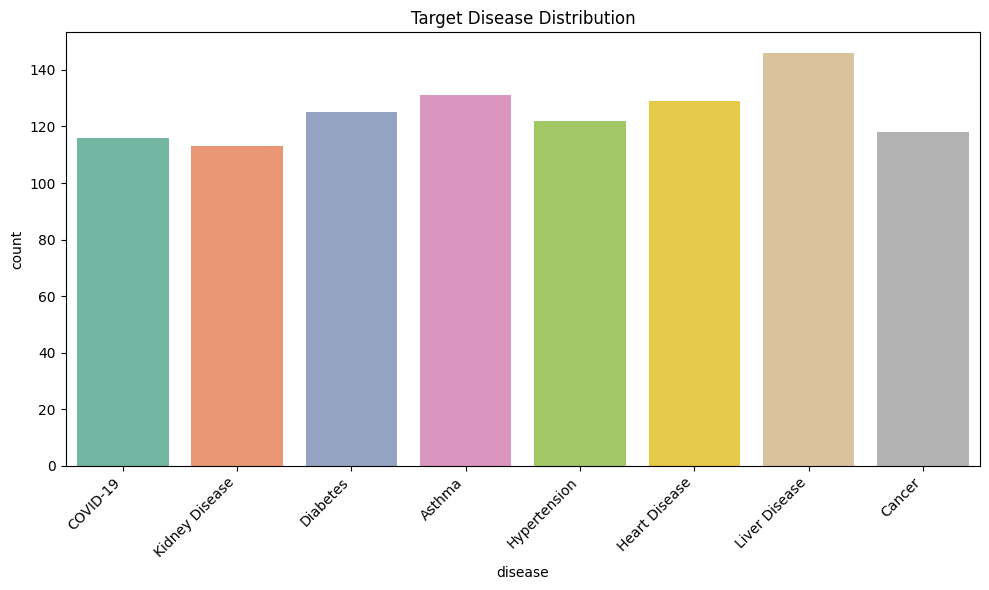

In [3]:

# Basic EDA
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Create countplot with color differentiation using a palette
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='disease', palette='Set2')
plt.title('Target Disease Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [4]:
# Import libraries
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to all columns
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Display the first few rows of the encoded DataFrame
df.head()

,irregular_heartbeat,sore_throat,dark_urine,slow_healing_wounds,unexplained_weight_loss,muscle_cramps,fatigue,nausea,fever,chest_pain,...,loss_of_taste,abdominal_pain,trouble_sleeping,frequent_urination,headache,swelling_in_legs,increased_thirst,blurred_vision,dizziness,disease
0,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,6
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Split data into features (X) and target (y)
X = df.drop(columns=["disease"])
y = df["disease"]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Train model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00        25
           4       0.96      1.00      0.98        23
           5       1.00      0.96      0.98        28
           6       0.84      1.00      0.91        21
           7       1.00      0.88      0.94        33

    accuracy                           0.97       200
   macro avg       0.97      0.98      0.98       200
weighted avg       0.98      0.97      0.98       200



In [7]:
# Save model
joblib.dump(clf, 'model.pkl')

# Download the file
from google.colab import files
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>